<a href="https://colab.research.google.com/github/7-sumit/Hotel-Booking-Analysis/blob/main/Sumit_Berde_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b>  Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.

## <b> Explore and analyze the data to discover important factors that govern the bookings.

## Importing libraries

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Setting fontsizes,fontweight,label weight for lebels,titles.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

# Set maximum columns to be display in datafram as 36
pd.set_option("display.max_columns", 36)
sns.set_style('darkgrid')

## Mounting Drives

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Reading csv

In [ ]:
# Reading the csv
df = pd.read_csv('/content/drive/MyDrive/Hotel Booking Anaysis - EDA project/Hotel Bookings.csv')

## Data Exploration

In [ ]:
# Checking the number of rows and columns
print(f'We have {df.shape[0]} number of rows and {df.shape[1]} number of columns')

We have 119390 number of rows and 32 number of columns


In [ ]:
# Printing top 5 rows
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Printing bottom 5 rows
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
# Checking basic info and data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# Printing the statistical information of columns
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## Data Description
1. **hotel** : *Hotel(Resort Hotel or City Hotel)* 

2. **is_canceled** : *Value indicating if the booking was canceled (1) or not (0)*

3. **lead_time** : *Number of days that elapsed between the entering date of the booking into the PMS and the arrival date*

4. **arrival_date_year** : *Year of arrival date*

5. **arrival_date_month** : *Month of arrival date*

6. **arrival_date_week_number** : *Week number of year for arrival date*

7. **arrival_date_day_of_month** : *Day of arrival date*

8. **stays_in_weekend_nights** : *Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel*

9. **stays_in_week_nights** : *Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel*

10. **adults** : *Number of adults*

11. **children** : *Number of children*

12. **babies** : *Number of babies*

13. **meal** : *Type of meal booked. Categories are presented in standard hospitality meal packages:*

14. **country** : *Country of origin.`*

15. **market_segment** : *Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”*

16. **distribution_channel** : *Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”*

17. **is_repeated_guest** : *Value indicating if the booking name was from a repeated guest (1) or not (0)*

18. **previous_cancellations** : *Number of previous bookings that were cancelled by the customer prior to the current booking*

19. **previous_bookings_not_canceled** : *Number of previous bookings not cancelled by the customer prior to the current booking*

20. **reserved_room_type** : *Code of room type reserved* 

21. **assigned_room_type** : *Code for the type of room assigned to the booking.* 

22. **booking_changes** : *Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation*

23. **deposit_type** : *Indication on if the customer made a deposit to guarantee the booking.*

24. **agent** : *ID of the travel agency that made the booking*

25. **company** : *ID of the company/entity that made the booking or responsible for paying the booking.* 

26. **days_in_waiting_list** : *Number of days the booking was in the waiting list before it was confirmed to the customer*

27. **customer_type** : *Type of booking, assuming one of four categories*


28. **adr** : *Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights*

29. **required_car_parking_spaces** : *Number of car parking spaces required by the customer*

30. **total_of_special_requests** :* Number of special requests made by the customer (e.g. twin bed or high floor)*

31. **reservation_status** : *Reservation last status, assuming one of three categories*
* Canceled – booking was canceled by the customer
* Check-Out – customer has checked in but already departed
* No-Show – customer did not check-in and did inform the hotel of the reason why





32. **reservation_status_date** : *Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel*

In [ ]:
# Creating a copy of dataframe
df1 = df.copy()

In [ ]:
# Listing all the columns
df1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# Converting str data type to datatime data type
df1['reservation_status_date']=pd.to_datetime(df1['reservation_status_date'],format='%Y-%m-%d')

## Data Cleaning

In [ ]:
# Checking for duplicate values 
df1.duplicated().value_counts()    # True means duplicated rows

False    87396
True     31994
dtype: int64

### We have 31994 duplicate rows

In [ ]:
# Droping dublicate rows
df1 = df1.drop_duplicates()

In [ ]:
# Checking rows
df1.shape

(87396, 32)

In [ ]:
# Dealing with null values
df1.isnull().sum().sort_values(ascending=False)

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


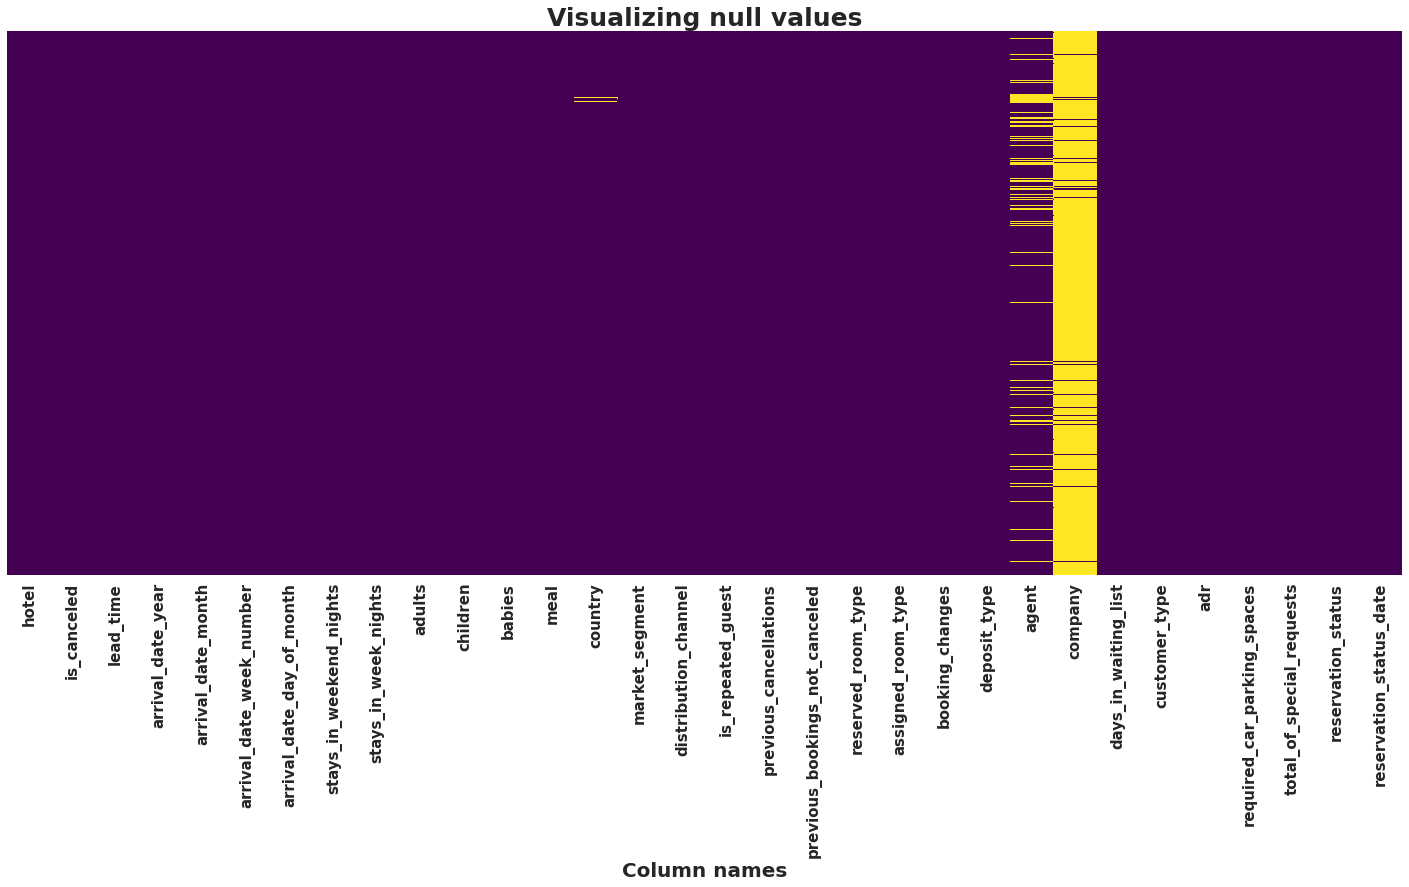

In [ ]:
# Visualizing missing values through heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(df1.isnull(),cmap='viridis',cbar=False, yticklabels=False)
plt.xlabel('Column names')
plt.title('Visualizing null values');

Null values are present in 4 columns namely company,agent,country and children
1. Filling nan values in company and agents with '0'
2. Filling nan values in country with 'other' 
3. Filling nan values in children with '0'.Assuming no children in family that visited the hotel

In [ ]:
# Filling nan values with '0'
columns = ['company','agent','children']
for i in columns:
  df1[i].fillna(0,inplace=True)

# Filling nan values with 'other'
df1['country'].fillna('other',inplace=True)

In [ ]:
# Checking for null values
df1.isnull().sum().sort_values(ascending=False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

In [ ]:
# Adding new columns 
df1['total_people']=df1['adults'] + df1['children'] + df1['babies']

df1['total_stays']= df1['stays_in_weekend_nights'] + df1['stays_in_week_nights']

In [ ]:
# Checking for discrepancies in dataframe
df1[['hotel','is_canceled','lead_time','reservation_status','reservation_status_date','total_people','total_stays']][df1['total_people']==0]

,hotel,is_canceled,lead_time,reservation_status,reservation_status_date,total_people,total_stays
2224,Resort Hotel,0,1,Check-Out,2015-10-06,0.0,3
2409,Resort Hotel,0,0,Check-Out,2015-10-12,0.0,0
3181,Resort Hotel,0,36,Check-Out,2015-11-23,0.0,3
3684,Resort Hotel,0,165,Check-Out,2016-01-04,0.0,5
3708,Resort Hotel,0,165,Check-Out,2016-01-05,0.0,6
...,...,...,...,...,...,...,...
115029,City Hotel,0,107,Check-Out,2017-06-30,0.0,3
115091,City Hotel,0,1,Check-Out,2017-07-01,0.0,1
116251,City Hotel,0,44,Check-Out,2017-07-17,0.0,2
116534,City Hotel,0,2,Check-Out,2017-07-22,0.0,7


* Looks like some wrong entries were feed in the dataset as as total_people leaving in a room were recorded to be 0 even though they have checked out.
* Droping those 166 rows

In [ ]:
# Deleting rows where total_people=0
df1.drop(df1[df1['total_people']==0].index,inplace=True)

In [ ]:
# Final rows and columns
df1.shape

(87230, 34)

In [ ]:
# Checking all the unique values in each categorical columns
columns=['hotel','meal','market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type','reservation_status']

for col in columns:
  print(f'The unique values in {col} are :',df1[col].unique())

The unique values in hotel are : ['Resort Hotel' 'City Hotel']
The unique values in meal are : ['BB' 'FB' 'HB' 'SC' 'Undefined']
The unique values in market_segment are : ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
The unique values in distribution_channel are : ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
The unique values in reserved_room_type are : ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B']
The unique values in assigned_room_type are : ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'L' 'K']
The unique values in deposit_type are : ['No Deposit' 'Refundable' 'Non Refund']
The unique values in customer_type are : ['Transient' 'Contract' 'Transient-Party' 'Group']
The unique values in reservation_status are : ['Check-Out' 'Canceled' 'No-Show']


# **EDA(Exploratory Data Analysis)** 

##Q1) Which type of hotel is mostly preferrred by the guests ?

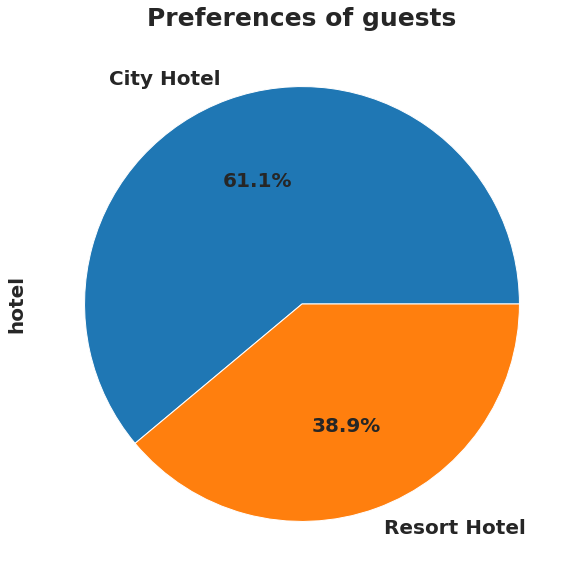

In [ ]:
# Plotting a pie chart
df1['hotel'].value_counts().plot.pie(shadow=False,autopct='%1.1f%%',figsize=(10,10),fontsize=20)
plt.title('Preferences of guests');

### Observation: 61.1% of guests preferred City hotel and 38.9% of guests preferred Resort hotel

## Q2) Which year hotels experienced the most traffic ?

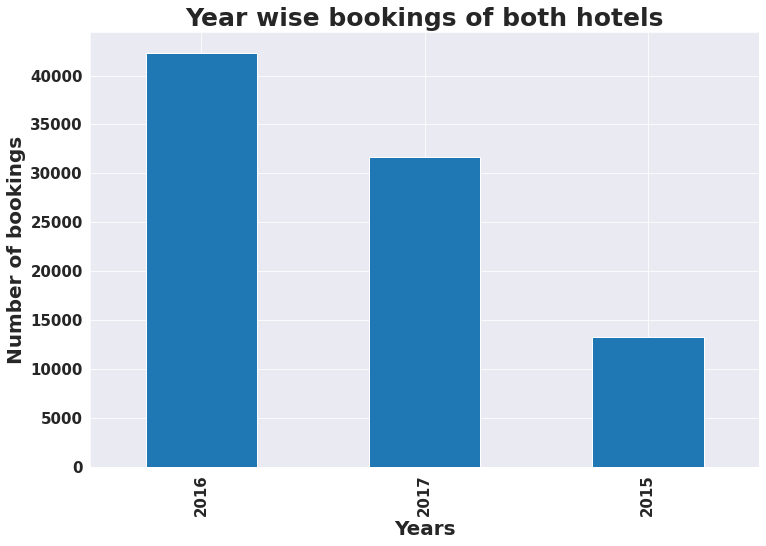

In [ ]:
#Plotting bar graph
df1['arrival_date_year'].value_counts().plot.bar(figsize=(12,8))
plt.xlabel('Years')
plt.ylabel('Number of bookings')
plt.title('Year wise bookings of both hotels');

### Observation: In 2016 maximum number of guests visited the hotels and 2015 was the worst performing year for the hotels

## Q3) Which distribution channel is mostly used for hotel bookings ?

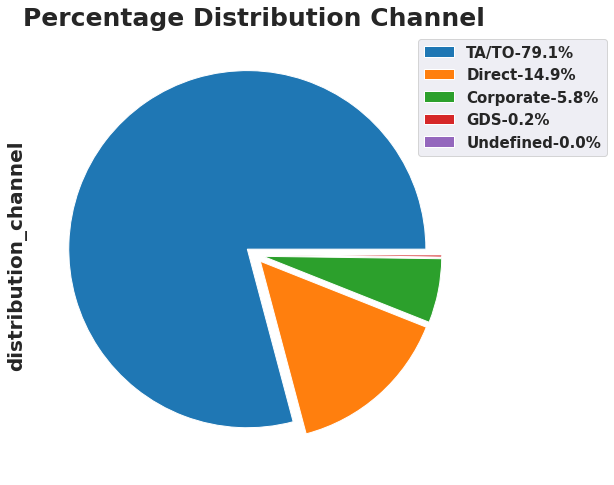

In [ ]:
# Here while plotting pie chart problem of overlapping of labels occurs to avoid this few extra lines of code are written

# Creating list of labels
types = df1['distribution_channel'].value_counts().index.tolist()

# Creating distribution channel df
distribution_df = df1['distribution_channel'].value_counts().reset_index().rename(columns={'index':'distribution_channel','distribution_channel':'count'})

# Calculating percentages of different distribution channel
distribution_df['percentages'] = round(distribution_df['count']*100/np.sum(distribution_df['count']),1)

# Creating a list of percentages
percentages = distribution_df['percentages'].tolist()

# Formating labels in required format
labels = [f'{t}-{p}%'   for t,p in zip(types,percentages)]

# Plotting a pie chart
df1['distribution_channel'].value_counts().plot.pie(figsize=(8,9),labels=None,explode=(0.05,0.05,0.05,0.05,0.05))
plt.legend(labels=labels,loc='upper left',bbox_to_anchor=(0.85, 1))
plt.title('Percentage Distribution Channel');

### Observation: TA/TO(79.1%) is the most preferred booking channel

## Q4) Which deposist type is mostly used by guests ?


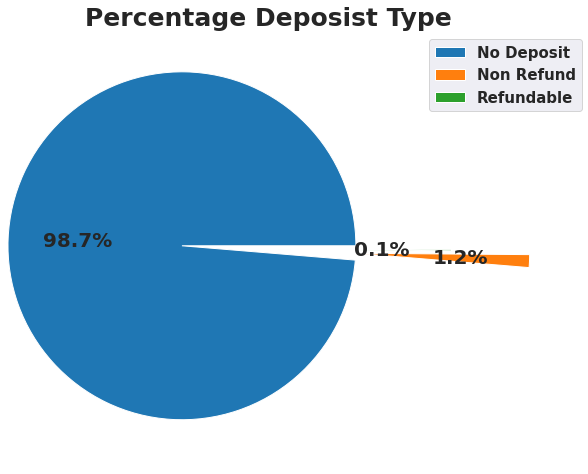

In [ ]:
# Plotting pie chart
df1['deposit_type'].value_counts().plot.pie(explode=(0.5,0.5,0.05),shadow=False,autopct='%1.1f%%',figsize=(12,8),fontsize=20,labels=None)
labels=df1['deposit_type'].value_counts().index.tolist()
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
plt.title('Percentage Deposist Type');

### Observation: High number of guests prefer 'No Deposist' type almost 98.7%

## Q5) Which type of meal is preferred by guests ?


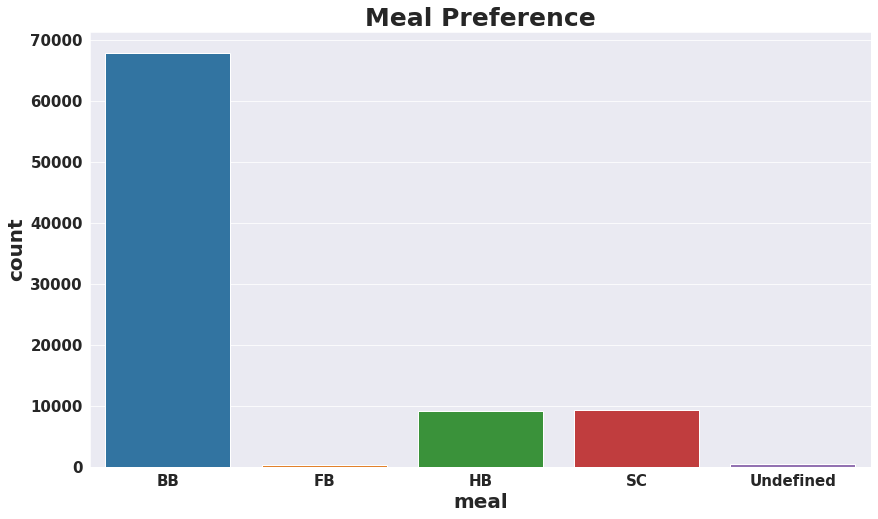

In [ ]:
# Plotting a count plot
plt.figure(figsize=(14,8))
sns.countplot(x='meal',data=df1)
plt.title('Meal Preference');

###Types of meal in hotels:
1. BB - (Bed and Breakfast)
2. HB- (Half Board)
3. FB- (Full Board)
4. SC- (Self Catering)

### Observation: *Bed and Breakfast(BB) are most preferred by the guests* 

## Q6) Which agent has done most bookings ?

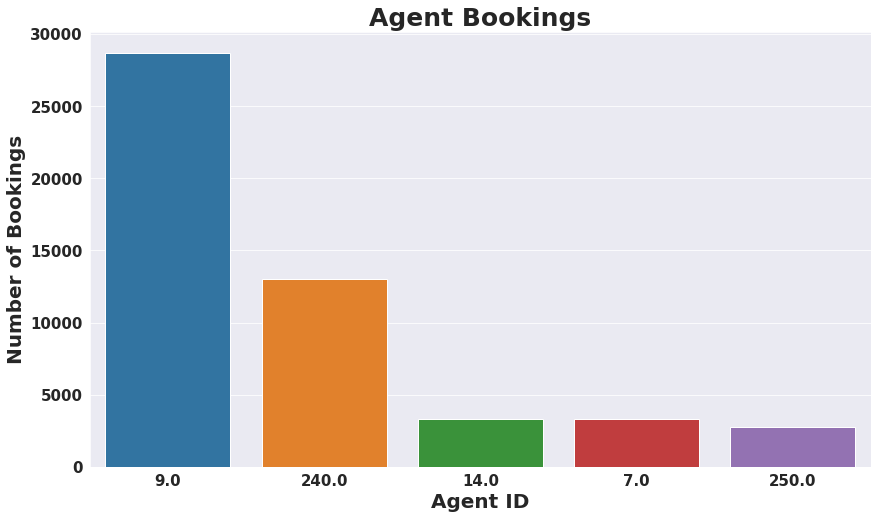

In [ ]:
# Remember we have replaced 'Nan' values in agents with '0'.Lets create new top_five_agents_df and drop all those values
top_five_agents_df = df1['agent'].value_counts().reset_index().rename(columns={'index':'agent_id','agent':'bookings'})

# Droping row with agent id '0' to get get rid of nan values 
top_five_agents_df = top_five_agents_df[top_five_agents_df['agent_id']!=0.0].iloc[0:5]

# Plotting a bar plot
plt.figure(figsize=(14,8))
sns.barplot(x='agent_id',y='bookings',data=top_five_agents_df,order=top_five_agents_df['agent_id'])
plt.xlabel('Agent ID')
plt.ylabel('Number of Bookings')
plt.title('Agent Bookings');

### Observation: Agent Id 9 has done most number of bookings

## Q7) Top 10 countries from where guests are coming ?

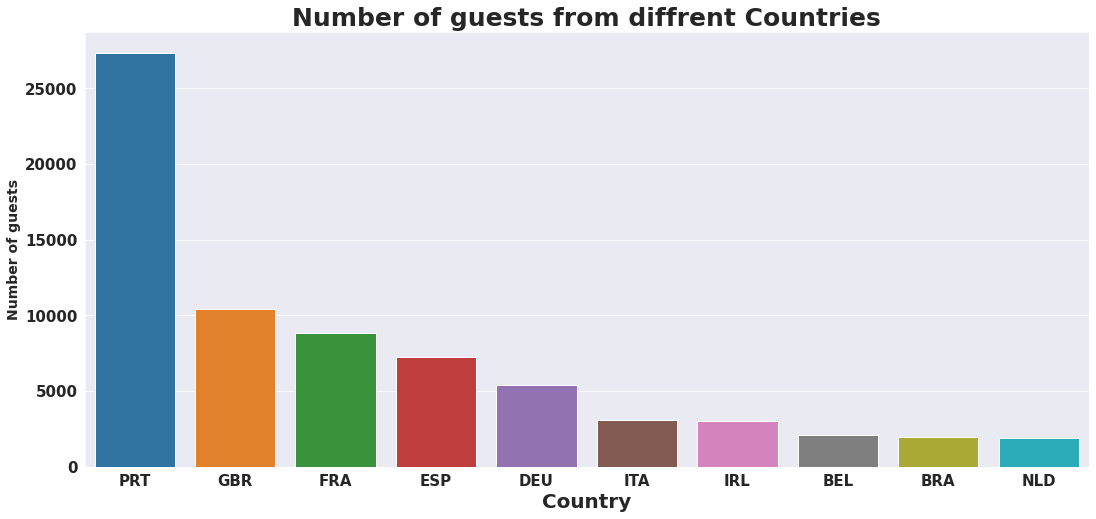

In [ ]:
# Counting the guests from various countries.
country_df=df1['country'].value_counts().reset_index().rename(columns={'index': 'country','country': 'count of guests'})[:10]

# Plotting a bar plot
plt.figure(figsize=(18,8))
sns.barplot(x=country_df['country'],y=country_df['count of guests'])
plt.xlabel('Country')
plt.ylabel('Number of guests',fontsize=14)
plt.title("Number of guests from diffrent Countries");

### Observation: Portugal is the country from where most guests are coming from
### abbreviations for countries-
1.   PRT- Portugal
2.   GBR- United Kingdom
3.   FRA- France
4.   ESP- Spain
5.   DEU - Germany
6.   ITA -Itlay
7.   IRL - Ireland
8.   BEL -Belgium
9.   BRA -Brazil
10.  NLD-Netherlands

## Q8) What is the percentage of cancellation of hotel bookings ?

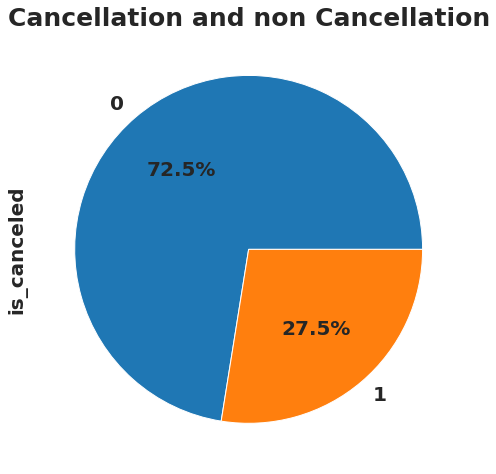

In [ ]:
# Plotting a pie chart
df1['is_canceled'].value_counts().plot.pie(autopct='%1.1f%%', shadow=False, figsize=(10,8),fontsize=20)
plt.title("Cancellation and non Cancellation");

### 0 : Not cancelled
### 1 : cancelled
### Observation: So 27.5% of total bookings were cancelled


## Q9) What is the percentage of repeated guests ?

Text(0.5, 1.0, ' Percentgae (%) of repeated guests')

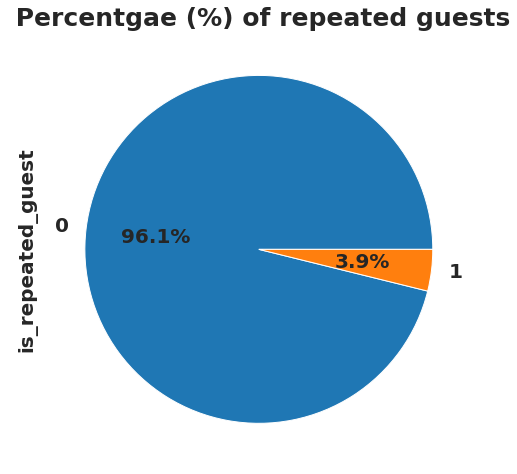

In [ ]:
# Plotting a pie chart
df1['is_repeated_guest'].value_counts().plot.pie(autopct='%1.1f%%',shadow=False,figsize=(12,8),fontsize=20)
plt.title(" Percentgae (%) of repeated guests")

### 0 : Not a repeated guests
### 1 : Is a repeated guests 
### Observation: Only 3.9% of guests were repeated guests  

## Q10) In which months hotel bookings were highest ?

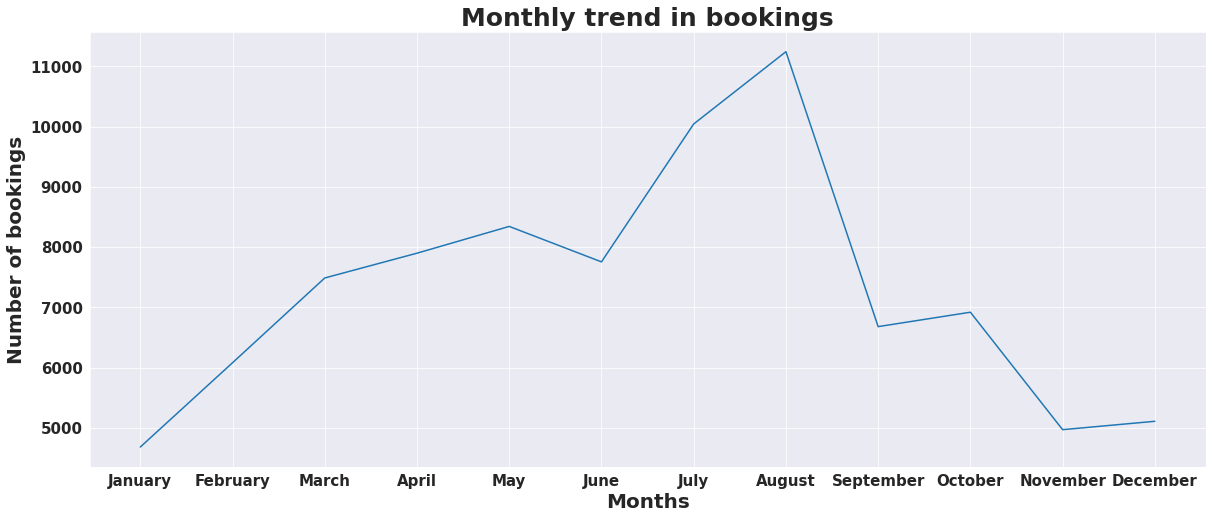

In [ ]:
# Creating a month_df with number of bookings for each month
months_df=df1['arrival_date_month'].value_counts(sort=False).reset_index().rename(columns={'index':'months','arrival_date_month':'bookings'})

# Create list of months in order
months_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Sorting months in order
months_df['months']=pd.Categorical(months_df['months'],categories=months_list,ordered=True)
months_df.sort_values('months',inplace=True) 

# Plotting line chart
plt.figure(figsize=(20,8))
plt.plot(months_df['months'],months_df['bookings'])
plt.xlabel('Months')
plt.ylabel('Number of bookings')
plt.title('Monthly trend in bookings');

### Observation: August and July were the months where highest bookings took place 

# Lets deep dive into dataset and try to answer some complex questions

## Q1) Which type of hotel has highest avg adr and in which months it was the highest ?


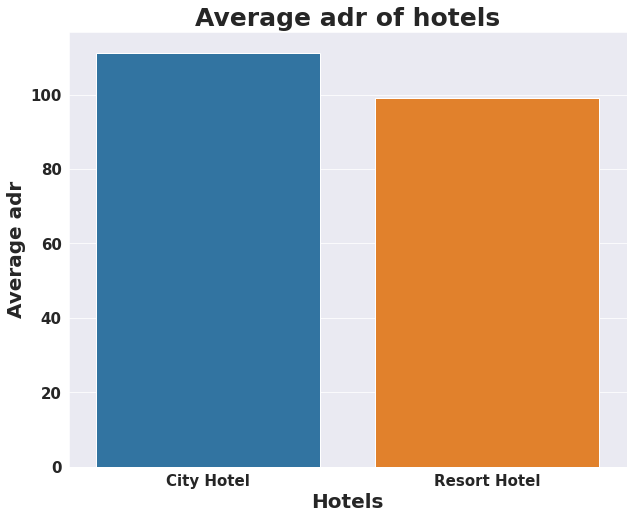

In [ ]:
# Finding average adr
avg_adr = df1.groupby('hotel')['adr'].mean().reset_index()

# Plotting a barplot
plt.figure(figsize=(10,8))
sns.barplot(x='hotel',y='adr',data=avg_adr)
plt.xlabel('Hotels')
plt.ylabel('Average adr')
plt.title('Average adr of hotels');

### Observation: City hotel have high adr as compared to resort hotel. Hence they are more profitable 

In [ ]:
# Finding the average ADR for each month and arranging in descending order
monthly_avg_adr = df1.groupby(['hotel','arrival_date_month'])['adr'].mean().reset_index().sort_values(['hotel','adr'],ascending=False)

monthly_avg_adr

,hotel,arrival_date_month,adr
13,Resort Hotel,August,187.566659
17,Resort Hotel,July,156.166914
18,Resort Hotel,June,112.380859
23,Resort Hotel,September,100.892331
20,Resort Hotel,May,80.551101
12,Resort Hotel,April,79.283805
14,Resort Hotel,December,65.488671
22,Resort Hotel,October,63.723065
19,Resort Hotel,March,57.590889
15,Resort Hotel,February,54.102809


### Observations:
### 1. Resort hotel has highest avg adr in August(187.57)
### 2. City hotel has highest avg adr in May(128.05)  

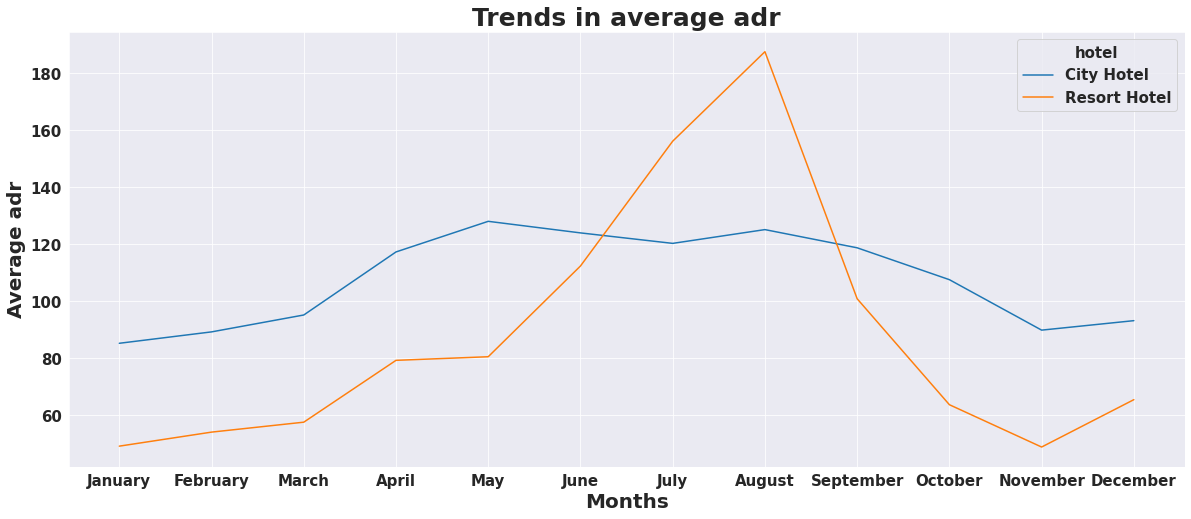

In [ ]:
# Creating a copy of monthly_avg_adr 
monthly_avg_adr_sort = monthly_avg_adr.copy()

# Sorting months_avg_adr in terms of months in a year_
monthly_avg_adr_sort['arrival_date_month']=pd.Categorical(monthly_avg_adr_sort['arrival_date_month'],categories=months_list,ordered=True)
monthly_avg_adr_sort.sort_values('arrival_date_month',inplace=True) 

# Plotting a line plot
plt.figure(figsize=(20,8))
sns.lineplot(x='arrival_date_month',y='adr',hue='hotel',data=monthly_avg_adr_sort)
plt.xlabel('Months')
plt.ylabel('Average adr')
plt.title('Trends in average adr');

### Observations:
### 1. City hotel have more less same avg adr over months showing more consistency
### 2. Resort hotel show large variation in avg adr. It shows inconsistent performance over months   

## Q2) What is the average loss in adr due to cancellations for both hotels ?

In [ ]:
# Creating a dataframe consisting of only cancelled bookings
cancellation_df = df1[df1['is_canceled']==1]

In [ ]:
# Calculating total number of bookings for each hotels
total_bookings = df1['hotel'].value_counts().reset_index().rename(columns={'index':'hotels','hotel':'total_bookings'})

# Calculating total number of cancellations for each hotels
total_cancellations = cancellation_df['hotel'].value_counts().reset_index().rename(columns={'index':'hotels','hotel':'total_cancellations'})

# Merging the two dataframes
merged_df = pd.merge(total_bookings,total_cancellations,how='inner',on='hotels')

# Calculating percentage cancellation for each hotels
merged_df['percentage_cancellations']= round((merged_df['total_cancellations']/merged_df['total_bookings'])*100,2)

# Calculating avg loss in adr due to cancellations
loss_in_adr = cancellation_df.groupby('hotel')['adr'].mean().reset_index().rename(columns={'hotel':'hotels','adr':'avg_loss_in_adr'})

# Merging the two dataframes to get final df
merged_df = pd.merge(merged_df,loss_in_adr,how='inner',on='hotels')

merged_df

,hotels,total_bookings,total_cancellations,percentage_cancellations,avg_loss_in_adr
0,City Hotel,53274,16035,30.10,117.379025
1,Resort Hotel,33956,7974,23.48,118.799984


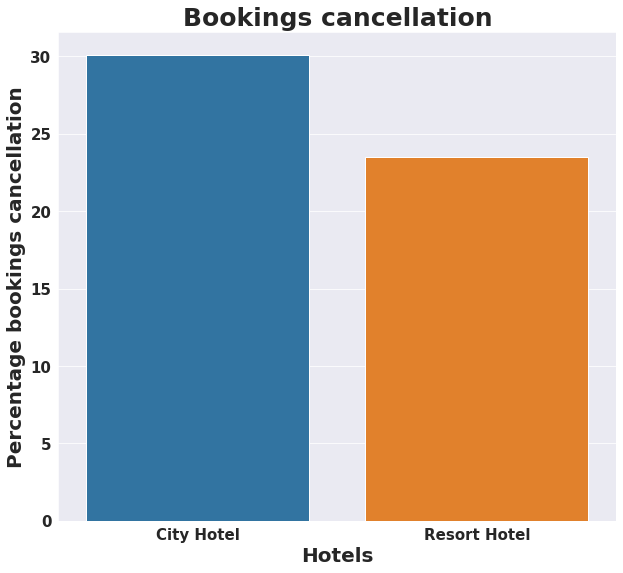

In [ ]:
# Plotting a bar chart
plt.figure(figsize=(10,9))
sns.barplot(x='hotels',y='percentage_cancellations',data=merged_df)
plt.xlabel('Hotels')
plt.ylabel('Percentage bookings cancellation')
plt.title('Bookings cancellation');

### Observations:
### 1. City hotel has 30.10% cancellations while Resort hotel has 23.48% cancellations
### 2. City hotel has high percentage of cancellation as compared to Resort hotel 
 

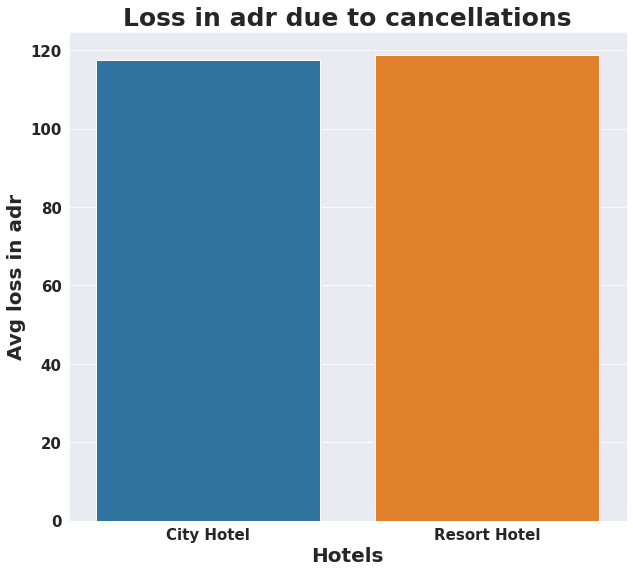

In [ ]:
# Plotting a bar plot
plt.figure(figsize=(10,9))
sns.barplot(x='hotels',y='avg_loss_in_adr',data=merged_df)
plt.xlabel('Hotels')
plt.ylabel('Avg loss in adr')
plt.title('Loss in adr due to cancellations');

### Observation: Average loss in adr is almost same for both the hotels 
### 1. City hotel = 117.37
### 2. Resort hotel = 118.79

## Q3) Which distribution channel has highest number of cancellations ?

In [ ]:
cancellation_df.pivot_table(index='hotel',columns='distribution_channel',values='is_canceled',aggfunc=np.sum,margins=True,margins_name= 'total_cancellations')


distribution_channel,Corporate,Direct,GDS,TA/TO,Undefined,total_cancellations
hotel,,,,,,
City Hotel,330.0,971.0,36.0,14694.0,4.0,16035
Resort Hotel,316.0,952.0,NaN,6706.0,NaN,7974
total_cancellations,646.0,1923.0,36.0,21400.0,4.0,24009


### Observations:
### 1. In City hotel most cancellations took place through TA/TO(14,694) followed by Direct bookings(971)
### 2. In Resort hotel most cancellations took place through TA/TO(6706) followed by Direct bookings(1923)

## Q4) How the number of special requests made affects the adr? 

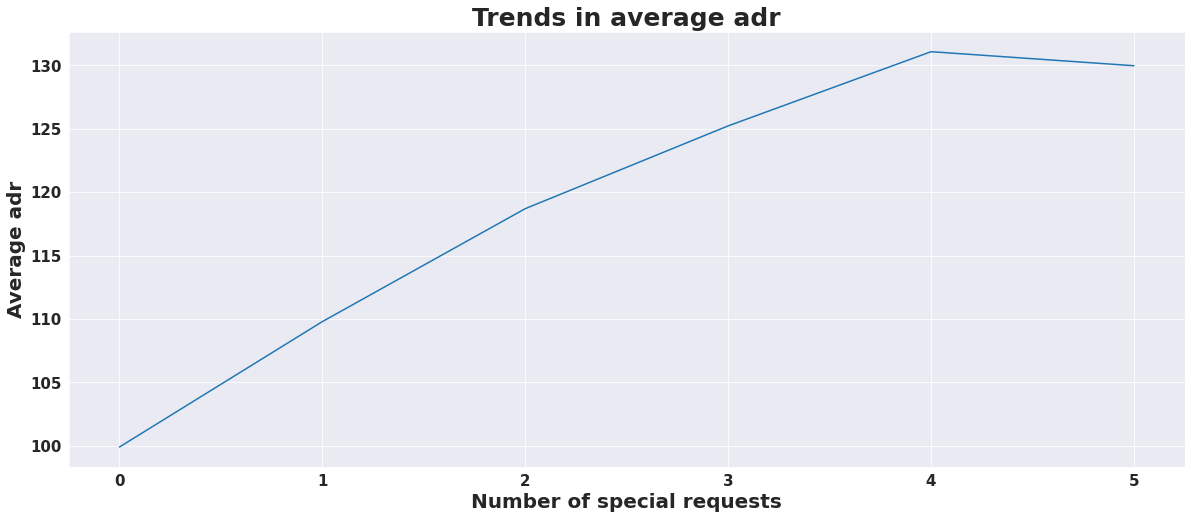

In [88]:
# Creating a df to find the avg adr for number of special requests
special_requests_df = df1.groupby('total_of_special_requests')['adr'].mean().reset_index().rename(columns={'adr':'avg_adr'})

# Plotting a line chart
plt.figure(figsize=(20,8))
sns.lineplot(x='total_of_special_requests',y='avg_adr',data=special_requests_df)
plt.xlabel('Number of special requests')
plt.ylabel('Average adr')
plt.title('Trends in average adr');

### Observations:
### 1. We can observe that as the number of special requests increases the avg adr also increases
### 2. There is slight dip in avg adr at 5 due to some odd reason may be due to some discrepancies in dataset or hotels may be providing some discounts


## Q5) Which type of customer has highest avg adr?

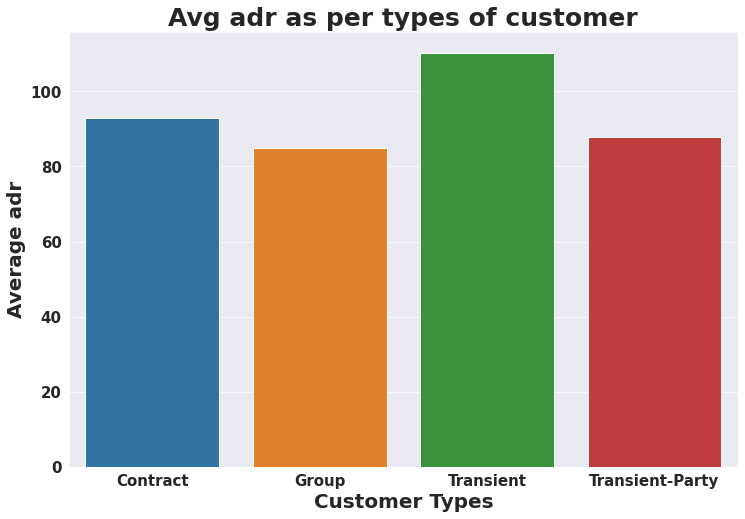

In [96]:
customer_df = df1.groupby('customer_type')['adr'].mean().reset_index().rename(columns={'adr':'avg_adr'})
plt.figure(figsize=(12,8))
sns.barplot(x='customer_type',y='avg_adr',data=customer_df)
plt.xlabel('Customer Types')
plt.ylabel('Average adr')
plt.title('Avg adr as per types of customer');

### Observation: Transient customers has the highest average adr